In [1]:
import requests
import pandas as pd
import time
import datetime

In [20]:
def get_active_addresses(crypto_name,date_from,freq):
    timestamp = str(int(time.mktime(datetime.datetime.strptime(date_from, "%d/%m/%Y").timetuple())))
    query={'a': crypto_name, 'api_key': '1vLaflOwBnwPUOu2gBqhHJdOE6y','s':timestamp,'i':freq,'f':'JSON'}
    response = requests.get('https://api.glassnode.com/v1/metrics/addresses/active_count', params=query)
    df = pd.read_json(response.text, convert_dates=['t'])
    return df

In [23]:
df = get_active_addresses('BTC','01/01/2017','24h')
df.index = pd.to_datetime(df['t'],unit='day')
df.head()
df.drop('t',1)

,v
t,
2016-12-31,571936
2017-01-01,463375
2017-01-02,703943
2017-01-03,654405
2017-01-04,696039
...,...
2021-07-14,819548
2021-07-15,833325
2021-07-16,764274


<AxesSubplot:xlabel='t'>

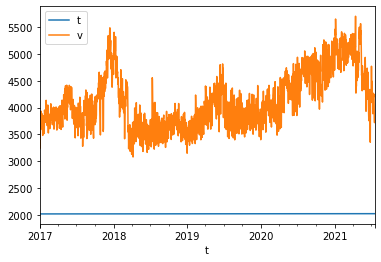

In [24]:
df.plot()